# Task 46

### Capstone Project - Image Processing

# MNIST Data
Source : https://www.kaggle.com/datasets/karthikshankarindia/mnist-train-and-test

Both Train and Test Data was merged for this exercise.

In [1]:
# Import modules.

    # Libraries.
%matplotlib inline
import numpy as np
import pandas as pd


    # Preprocessing.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

    # ML Classification and Metrics.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

    # for visualisation.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def run_ensemble_forest(r,initial, last, step, depth, depth_step, X_train, y_train, X_dev, y_dev):
    """
    Function to run multiple Random Forests with different n_estimator and max_depth ranges
    All results appended to indiviudal lists.
    """
    
    # Record reach set of n_Estimator, depth and accuracy results.
    accuracy_scores_bf = []
    accuracy_scores_bt = []
    n_estimate_values = []
    depth_values = []
    
    # Run RF classifier 
    for n in range(initial, last, step):
        for d in range(1, depth, depth_step):
            ensemble_forest_bf = RandomForestClassifier(n_estimators=n, 
                                                        random_state=r, 
                                                        max_depth=d,
                                                        bootstrap = False)
            ensemble_forest_bf.fit(X_train, y_train)
            score = ensemble_forest_bf.score(X_dev, y_dev)
            n_estimate_values.append(n)
            depth_values.append(d)
            accuracy_scores_bf.append(score)
            
            ensemble_forest_bt = RandomForestClassifier(n_estimators=n, 
                                                        random_state=r, 
                                                        max_depth=d,
                                                        bootstrap = True)
            
            ensemble_forest_bt.fit(X_train, y_train)
            score = ensemble_forest_bt.score(X_dev, y_dev)
            accuracy_scores_bt.append(score)
                    
    return n_estimate_values, depth_values, accuracy_scores_bf, accuracy_scores_bt

In [3]:
def forest_3d(g1,g2,g3,title):
    """
    Function to create 3d Plot showing n_estimator, depth vs accuracy
    """
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot scatter with colour grade
    g1_unique = np.unique(g1)
    colors = np.where(np.isin(g1, g1_unique), g1, np.nan)
    sc = ax.scatter(g1, g2, g3, c=colors, cmap='viridis')

    # Customise Plot
    plt.title(title)
    plt.subplots_adjust(left=0.25, right=0.8, bottom=0.2, top=0.8)
    #plt.colorbar(sc)
    ax.set_xlabel('N_estimator')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Accuracy')

    # Show Plot
    plt.show()
    plt.close()

In [32]:
def confusion_heatmap(cm, min, max):
    """
    Function to convert cm_df into heatmap plot
    """
    # Convert cm_df to heatmap plot
    plt.figure(figsize =(15,15))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(cm, cmap=cmap, annot=True, vmin=min, vmax=max, cbar_kws={'ticks': [min, max]})

    #Customise PLot
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Show Plot
    plt.show()
    plt.close()

    # TP, FP
    # FN, TN

In [5]:
def evaluation_metrics(y_true, y_pred):
    """
    Function to call evaluation metrics for tested models.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average = "macro")
    recall = recall_score(y_true, y_pred, average = "macro")
    f1 = f1_score(y_true, y_pred, average = "macro")
    print("Accuracy: ", round(accuracy,2))
    print('Precision:', round(precision,2))
    print('Recall:', round(recall,2))
    print("F1-Score: ", round(f1,2))
    
    return accuracy, precision, recall, f1

### Load Data

In [6]:
# load our dataset.
mnist_df = pd.read_csv("mnist_combined.csv")

In [7]:
# View keys of dataset
print(mnist_df.keys())

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [8]:
# Review dataset.
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.2 MB


Assign data to numpy array from Pandas Dataframe

In [9]:
# Select and assign in np array X data and y data labels.
X = mnist_df.iloc[:,1:786].values
y = mnist_df.iloc[:,[0]].values.ravel()

In [10]:
# Random Seed
r = 20489

Random state ensures X and Y remain matched

In [11]:
# Shuffle x and y records
X, y = shuffle(X, y, random_state= r)

A training dataset is used to train a selected model to identify patterns and relationships between features and targets in the data. Care must be taken when fitting the model to avoid underfitting or overfitting, which can affect the accuracy of predictions on unseen data.

The development dataset is used to evaluate and tune the trained model. The model is validated and tuned to prevent underfitting or overfitting and achieve good generalization on unseen data. In the context of recognizing handwritten digits for security purposes, both low false positive and false negative results should be considered, although low false positive results may be slightly more important.

The test dataset is used to evaluate the performance of the tuned model. It is independent of the development dataset and used to validate the model's ability to handle unseen data in the future.

In [12]:
# Splitting Data into Train, Development and Test Sets

    # Train (70%) and Development/Test (30%) Sets
X_train, X_dev, y_train, y_dev = train_test_split(X, 
                y, test_size=0.3, random_state = r)

    # Development (15%) and Test (15%) Sets
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, 
                y_dev, test_size= 0.5, random_state = r)

In [13]:
# Check data
print(y)

[8 6 9 ... 7 9 8]


In [14]:
# Review Shape of dataset
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


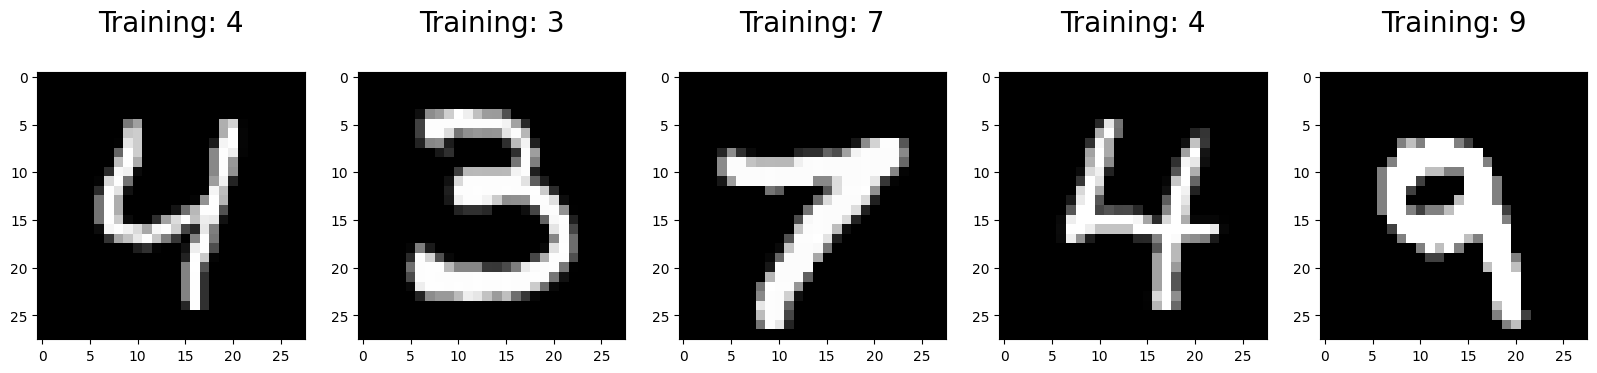

In [15]:
# Visualise input data
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### RandomForestClassifier

Variables from data to be split by impurity to predict digit label.

In [16]:
# Create Random Forest Ensemble model
ensemble_forest = RandomForestClassifier(bootstrap = False)
print(ensemble_forest)

ensemble_forest.get_params()

RandomForestClassifier(bootstrap=False)


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# Fit RF to X training data.
ensemble_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False)

In [18]:
# Get individual decision tress in RF
trees = ensemble_forest.estimators_

# Calculate maximum tree depth of each tree.
depths_list = []
for tree in trees:
    depths_list.append(tree.tree_.max_depth)

# Find maximum depth of trees. 
max_depth = max(depths_list)
print(max_depth)

46


In [19]:
preds = ensemble_forest.predict(X_dev)
print("Accuracy:", accuracy_score(y_dev,preds))

Accuracy: 0.969047619047619


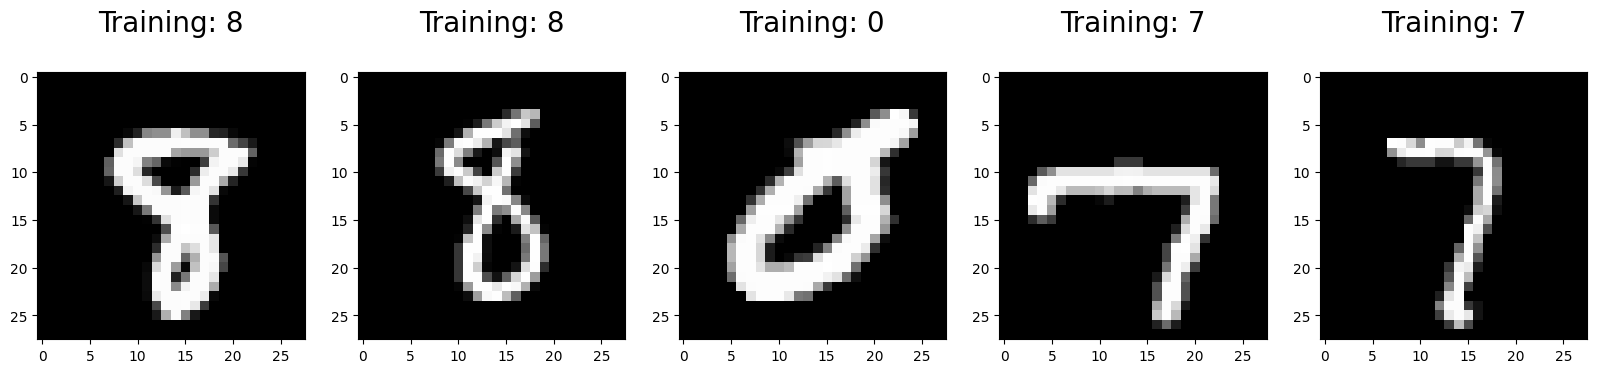

In [20]:
# Visualise dev X image and y predictions
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_dev[0:5], preds[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Note - On reviewing different sizes of training data sets above, we begin to see the types of features/strokes within individual digits that may be leading the model to select certain predictions. This is more notable when predictions are wrong i.e. predicting a '2' for a '3'm '0' for a '9' and '9' for a '4'.

Given the size of the samples being used, our initial development accuracy score is fairly high to start. 

In [21]:
# Print list of features by importance
feature_imp = pd.Series(ensemble_forest.
                        feature_importances_).sort_values(ascending
                                                          =False)
feature_imp

378    0.009992
406    0.008117
350    0.008098
433    0.007853
437    0.007813
         ...   
252    0.000000
253    0.000000
280    0.000000
308    0.000000
783    0.000000
Length: 784, dtype: float64

In [22]:
peak_value = mnist_df.iloc[:,378].head()
print(peak_value)

0    241
1      0
2      0
3    104
4     36
Name: 14x14, dtype: int64


Note -  Not relevant but interesting to check, values closer to 255 carry most information so most important i.e. those centred about the image 14x14 , 18 x 13 etc. Those with the least importance have no colour value or posistioned about image edges.  

### Tune Model

#### Given the example below, select and define Classifier Parameters further:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=1e-07, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Parameters we will investigate from above will include:

- 'bootstrap' = True / False.
- n_estimators = interger range.
- max_depth = interger range from 1-45.

These three have been selected to investigate the impact of bootstrapping (resampling data), n_estimator (number of voting trees in forest), and depth (length of longest path from root to leaf nodes based on 'Gini'). Criterion 'entrophy' not investigated.

In general, all three parameters tend to increase accuracy. Bootstrapping and n_estimators should mitigate risk of overfitting whereas depth will tend to increase the risk of overfitting. 

### n_estimators

In [23]:
# Print Accuracry Scores

# Set n_estimator range
initial = 1
last = 20
step = 2

# Set depth range
depth = 20
depth_step =4

# Run RF function, return scores.
g1, g2, g3, g4 = run_ensemble_forest(r,
                                     initial, 
                                     last, 
                                     step,
                                     depth,
                                     depth_step, 
                                     X_train,
                                     y_train, 
                                     X_dev, 
                                     y_dev)[:4]

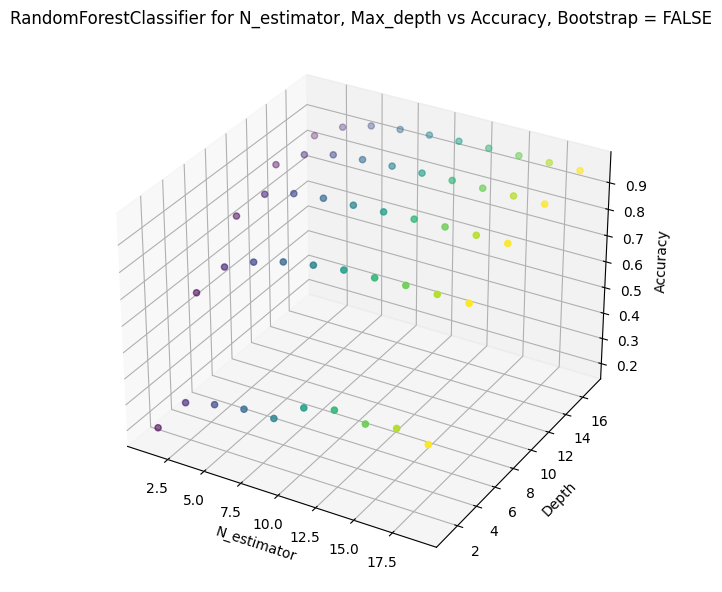

In [24]:
# Run forest_3d function
title = (f"RandomForestClassifier for N_estimator" +
         f", Max_depth vs Accuracy, Bootstrap = FALSE")
forest_3d(g1,g2,g3, title)

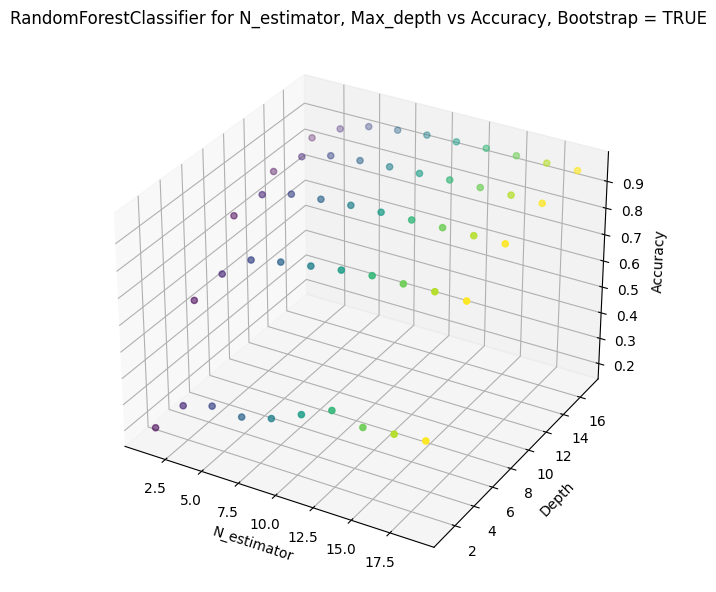

In [25]:
# Run forest_3d function
title = (f"RandomForestClassifier for N_estimator" +
         f", Max_depth vs Accuracy, Bootstrap = TRUE")
forest_3d(g1,g2,g4, title)

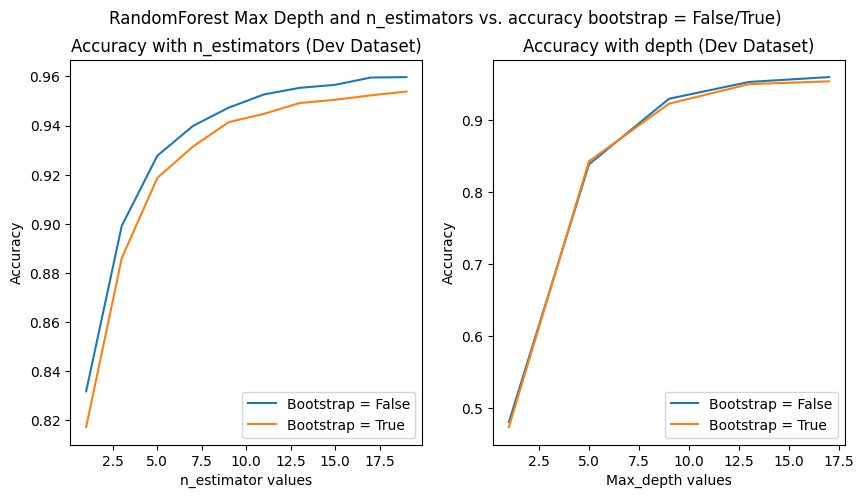

In [26]:
# Create Dataframe of n_estimator and accuracy Score
rf_df = pd.DataFrame({"n_estimator":g1, 
                      "depth":g2, 
                      "accuracy_bf" : g3, 
                      "accuracy_bt" : g4})

# group by max accuracy
max_acc_n_group_bf = rf_df.groupby("n_estimator")["accuracy_bf"].max()
max_acc_n_group_bt = rf_df.groupby("n_estimator")["accuracy_bt"].max()
max_acc_d_group_bf = rf_df.groupby("depth")["accuracy_bf"].max()
max_acc_d_group_bt = rf_df.groupby("depth")["accuracy_bt"].max()

# Plot subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle(f"RandomForest Max Depth and n_estimators vs. accuracy"+
             f" bootstrap = False/True)")

# First Plot -  Plot n_estimator by max accuracy bootstrap f/t
plt.subplot(1, 2, 1)
axs[0].plot(max_acc_n_group_bf.index, max_acc_n_group_bf.values,
            label="Bootstrap = False")
axs[0].plot(max_acc_n_group_bt.index, max_acc_n_group_bt.values,
            label="Bootstrap = True")
plt.title("Accuracy with n_estimators (Dev Dataset)")
plt.xlabel("n_estimator values")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")


# Second Plot -  Plot max_depth by max accuracy bootstrap f/t
plt.subplot(1, 2, 2)
axs[1].plot(max_acc_d_group_bf.index, max_acc_d_group_bf.values,
            label="Bootstrap = False")
axs[1].plot(max_acc_d_group_bt.index, max_acc_d_group_bt.values,
            label="Bootstrap = True")
plt.title("Accuracy with depth (Dev Dataset)")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

# Show PLot
plt.show()
plt.close()

In [27]:
# Review dataframe.
rf_df.head(10)

,n_estimator,depth,accuracy_bf,accuracy_bt
0,1,1,0.194667,0.194667
1,1,5,0.583429,0.551524
2,1,9,0.752762,0.749524
3,1,13,0.831810,0.800952
4,1,17,0.830190,0.817238
5,3,1,0.327905,0.315333
6,3,5,0.713238,0.683048
7,3,9,0.865238,0.858857
8,3,13,0.899143,0.886000
9,3,17,0.891524,0.879810


### Tunning Observations

With an increase in Depth, Accuracy increased then levelled off remaining at the same accuracy value. With low depths we may expect accuracy not to be too accurate on the validation set (underfitting). With high depths we may expect accuracy to be lower than optimum accuracy due to overfitting but this does not appear to occuring in this model.It appears to reach an optimum state without other complex noisy patterns emerging that are only spottable at higher depths - this may relate to the cleanlinest and preparedness of the MNIST dataset! It is possible that a higher number of splits is allowing for more opportunities to split data based on different stroke style patterns.

With an increase in N_estimator accuracy score increased, levelled off remaining at the same accuracy value. With lower n_estimator value accuracy is low. With a very high n_estimator value is high appearing at its optimum value (see note below).

With bootstrapping set to False in both cases accuracy increased. This is a little surprising given the prupose of bootstrapping is to reduce the risk of overfitting, therefore on unseen data (like the development dataset) we see loss of accuracy.  It is possible given we have only '10' digits that sampling with replacement sees that not all the dataset is being used which in effect may miss out on some of the stroke style patterns. Bootstrapping set to False may actually be generalising better. 

From the above, the optimum parameters would appear to be:
- Bootstrapping = FALSE
- n_estimator = 20
- depth = 17.

Note - Other models ran with higher number of n_estmator and depth. Above settled on for computation time.



### Final Model

We need to retrain and fit our model with choosen parameters.

In [28]:
# Select and define our final Classifier
final_forest = RandomForestClassifier(bootstrap=False, 
                                      max_depth=17, 
                                      n_estimators=20)

# Fit final RF to X training data.
final_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=17, n_estimators=20)

In [29]:
# Predict digits, validate using X_test data.
y_preds = final_forest.predict(X_test)

Create confusion matrix to show accuracy of model

Note - In this format, its not useful for quick assessment of true/false postives/negative metrics.

In [30]:
# Produce Confusion Matix for Predictions.
cm_mat = confusion_matrix(y_test, y_preds)
print(cm_mat)

[[1033    0    1    1    1    0    3    0    4    1]
 [   1 1165    6    5    3    1    2    4    1    0]
 [   4    1 1074    6    9    1    4    8    7    0]
 [   1    2   13 1024    0   14    0    7    6    9]
 [   2    0    1    1  997    1    2    2    3   28]
 [   6    2    0   12    3  881    3    0    2    6]
 [   1    0    1    0    3   11  989    1    3    0]
 [   0    6   11    3    8    0    0 1077    1   13]
 [   0    9    2   11    3    9    4    1  936   11]
 [   4    2    1    9   15    4    2    8    6  961]]


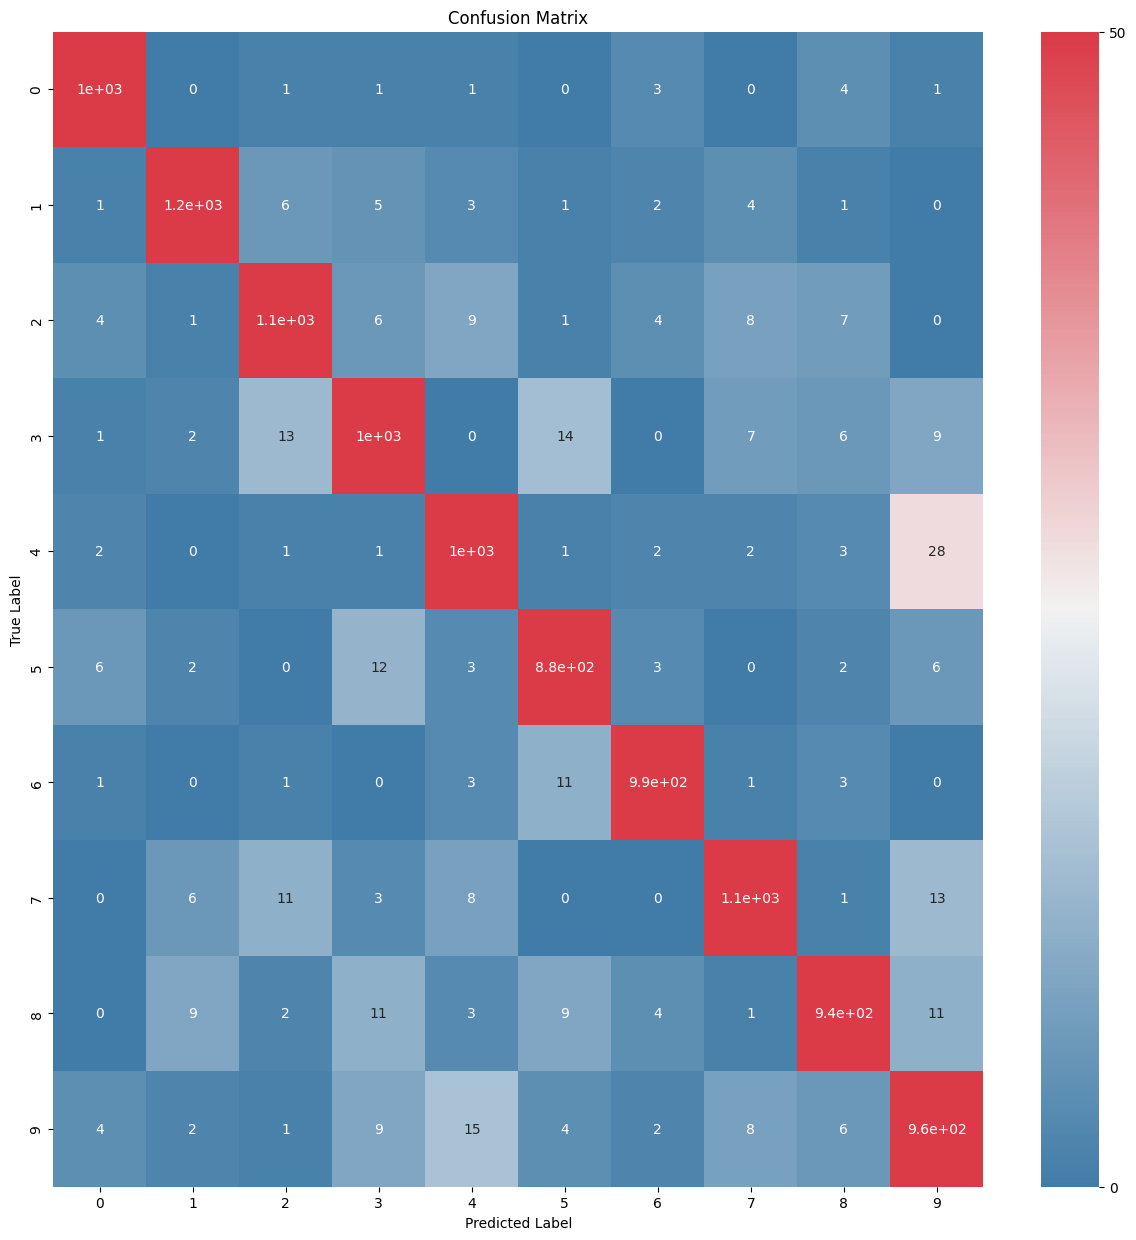

In [33]:
# Convert cm_df to heatmap plot for graph 6
min = 0
max = 50
confusion_heatmap(cm_mat,min, max)

Confusion Matrix Interpretation

- TP - digit is recognised by model correctly.
- FP / FN - digit incorrectly labelled by model.
- FN, TN - No explit negative class can be defined unless including for 'absence of a digit'. 

In [ ]:
# Sum diagonals
TP = np.sum(np.diagonal(cm_mat))

# Non-diagonals
FP = np.sum(cm_mat) - TP

print(TP)
print(FP)

10121
379


In [ ]:
# Evaluation metrics for Graph 1
evaluation_metrics(y_test, y_preds);

Accuracy:  0.96
Precision: 0.96
Recall: 0.96
F1-Score:  0.96


In [ ]:
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, (y_val, y_pred) in enumerate(zip(y_test, y_preds)):
    if y_val != y_pred:
        #print(f"Index: {i}, Actual label: {y_val}, Predicted label: {y_pred}")
        count[y_val] += 1
        
print("Count of mismatches for each label:", count)

Count of mismatches for each label: [7, 21, 49, 58, 43, 42, 16, 42, 46, 55]


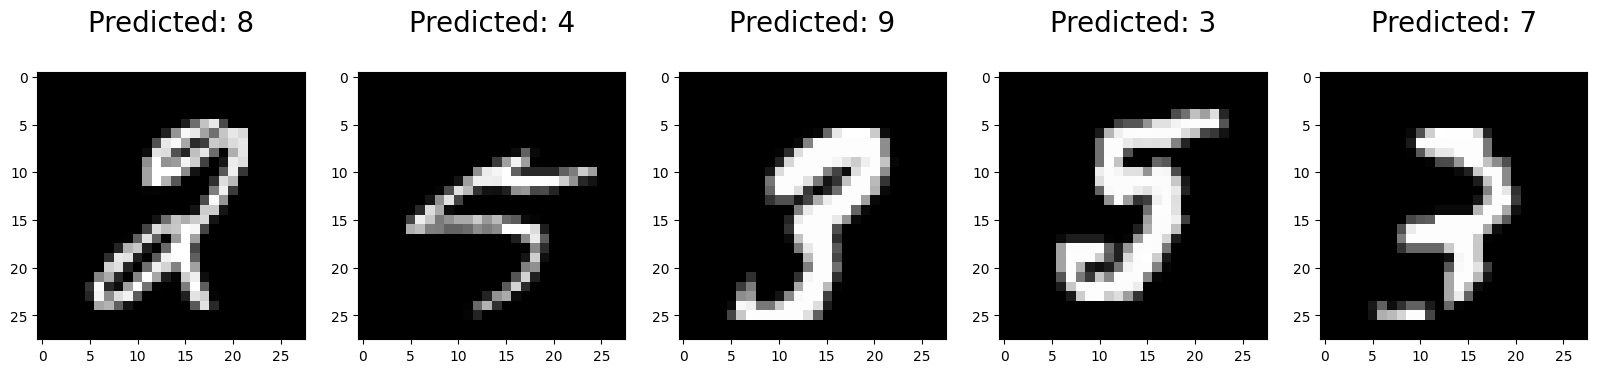

In [ ]:
# Visualise dev X image and y predictions
plt.figure(figsize=(20,4))
indices = [32,56,57,178,217]
for index, (image, label) in enumerate(zip(X_test[indices], y_preds[indices])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: %i\n' % label, fontsize = 20)

Given ill-defined FN and TN for this scenario, both precision and recall are equal. We don't have a situation where we are generating false negative predictions.

The model seemed to struggle similarly with recognizing the digits 2, 3, 4, 5, 7, 8, and 9. Among these digits, 3s and 9s were misidentified the most. On the other hand, the model performed well with recognizing 0s, 1s, and 6s, with 0s being identified correctly the most.

Based on the fraction of misidentified digits compared to those for the same digit that were correctly predicted,  the fraction misidentified is very low hense the high overall accuracy score.